In [5]:
library(tidyverse)

covariates <- read_csv("../dataDerived/covariates.csv") %>% 
    transmute(sample = as.character(sample),
              sex = ifelse(is_male, "Male", "Female"),
          group = ifelse(group == 0, "MCI", ifelse(group == -1, "Control", "LOAD")))

df <- 
    rbind(
        read_csv("../dataDerived/vcf.stats.csv") %>% mutate(type = "LOAD study"),
        read_csv("../dataDerived/vcf.stats.encode.csv") %>% mutate(type = "ENCODE")
    ) %>%
    left_join(covariates, by = "sample") %>%
    replace_na(list("group" = "ENCODE")) %>%
    mutate(group = factor(group, levels = c("ENCODE", "Control", "MCI", "LOAD")))


head(df)


── Column specification ────────────────────────────────────────────────────────
cols(
  sample = col_double(),
  group = col_double(),
  is_male = col_double(),
  bmi = col_double(),
  age = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  sample = col_double(),
  sample_only = col_double(),
  dbSNP_only = col_double(),
  intersection = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  sample = col_character(),
  sample_only = col_double(),
  dbSNP_only = col_double(),
  intersection = col_double()
)




sample,sample_only,dbSNP_only,intersection,type,sex,group
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
331,1180913,0,0,LOAD study,Male,Control
339,1167016,0,0,LOAD study,Female,LOAD
299,1336407,0,0,LOAD study,Male,Control
436,1178601,0,0,LOAD study,Female,LOAD
145,1518190,0,0,LOAD study,Female,LOAD
224,1307581,0,0,LOAD study,Female,Control


In [6]:
p <- df %>%
    mutate(
        n_snps = intersection + sample_only,
        percent = intersection / (n_snps)) %>%
    ggplot(aes(x = intersection, y = sample_only, color = group)) +
    geom_point(alpha = 0.8) +
    theme_minimal(base_size = 16) +
    ylab("Number of non-dbSNP SNPs") +
    xlab("Number of common SNPs") +
    #ylim(c(0.55, 0.75)) +
    ggsci::scale_color_npg()

#cowplot::save_plot(p, file = "figs/23-12-12-variantCallsBatchEffectsQualRaised.png")

Why the bimodality? Different filters??

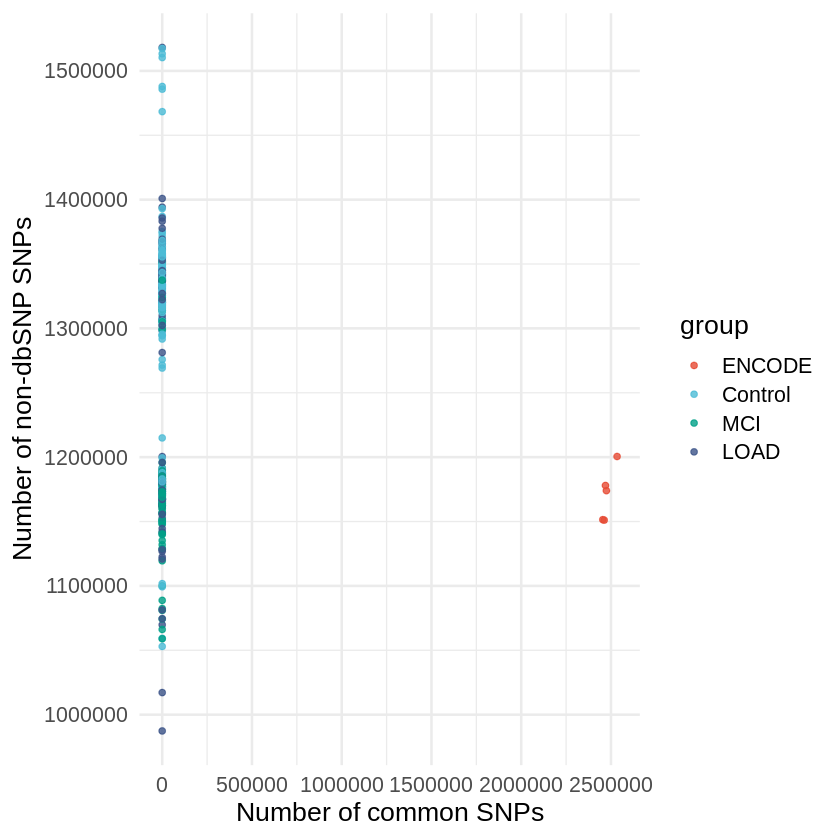

In [7]:
p